# LIST

* Mutable  
* Mixed-type

Lists are ordered sets of objects. They are powerful, flexible, and one of the most widely used data structures in all of Python.

**When a list is not the answer:**  

1) You need to store lots of floating point numbers  
2) You are constantly adding and removing items from the ends of a list  
3) You need to save/load lots of floating point numbers  
4) You plan iterate through a list that will never change

**Why #1?**  
* An array if much more efficient because an array only stores the packed bytes instead of the actual float objects

**Why #2?**  
* deque (double-ended queue) works faster

**Why #3?**
* An array is much more efficient

**Why #4?**
* A tuple is faster

# TUPLE

* Immutable
* Mixed-type

Tuples are often described as immutable lists. Because tuples are immutable they are faster than lists. So if you're looking for flexibility, go with a list. But if you're looking for speed and your list won't change, go with a tuple.

# ARRAY

* Mutable
* Single-type
* Fast loading/saving

An array is much more efficient than a list if you're only looking to store a single object type like a float. 

# DICTIONARY

* Mutable
* Keys mapped to values via hashing
* Incredibly fast
* Significant memory overhead

Dictionaries are unordered sets. Items in a dictionary are accessed via keys (not by index as in a list). Each key of the dictionary is mapped to a value and the values of a dictionary can be any Python data type. In other words, dictionaries are unordered key-value pairs. 

# SET

* Immutable
* Unique values
* Great for testing membership

A set is an unordered collection of unique and immutable objects. It's highly optimized for testing membership. So if you're thinking about using "in" to test membership, think again - sets are much, much faster!

# PERFORMANCE EXPERIMENT - LIST vs DICT vs SET

Let's generate 1M unique floats (our haystack) and 1,000 additional floats (our needles). 500 of our needles will be contained in our haystack and 500 will be guaranteed not to be. We will compare the performance of lists vs dicts vs sets for testing membership.

In [1]:
from array import array
from random import random
import numpy as np

np.random.seed(52)
haystack = array('d', (random() for i in range(10**6)))
needles_in = array('d', np.random.choice(haystack, size=500, replace=False))
needles_out = array('d', (random() for i in range(500)))
needles = array('d', list(needles_in) + list(needles_out))

In [2]:
len(needles)

1000

In [3]:
# show needles_in actually in haystack
len(set(needles_in) & set(haystack))

500

In [4]:
# show needles_out not in haystack
len(set(needles_out) & set(haystack))

0

In [5]:
# Setup
needlelist = list(needles)
haystacklist = list(haystack)

needledict = dict.fromkeys(needles)
haystackdict = dict.fromkeys(haystack)

needleset = set(needles)
haystackset = set(haystack)

In [6]:
def test_run(needle, haystack):
    found = 0
    for item in needle:
        if item in haystack:
            found +=1
    return found

In [7]:
# List performance
%timeit test_run(needlelist, haystacklist)

1 loop, best of 3: 9.86 s per loop


In [8]:
# Dict performance
%timeit test_run(needledict.keys(), haystackdict.keys())

10000 loops, best of 3: 187 µs per loop


In [9]:
# Set performance
%timeit test_run(needleset, haystackset)

1000 loops, best of 3: 180 µs per loop


In [10]:
# Set performance alternative to above - quicker bc uses optimized set logic
%timeit len(needleset & haystackset)

10000 loops, best of 3: 140 µs per loop


In [14]:
## proof that all are equivalent
test_run(needlelist, haystacklist) == test_run(needledict.keys(), haystackdict.keys()) == \
test_run(needleset, haystackset) == len(needleset & haystackset)

True

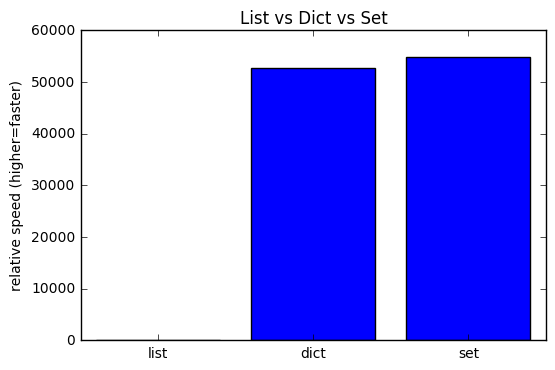

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(3), [1, 9.86/(187*10**-6), 9.86/(180*10**-6)], tick_label = ['list', 'dict', 'set'], align='center')
plt.ylabel('relative speed (higher=faster)')
plt.title('List vs Dict vs Set')